In [2]:
!pip install -q kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!touch ~/.kaggle/kaggle.json

In [6]:
api_token = {"username":"saikatm02","key":"6307a35334db87c7d0a8703520623d1a"}

In [7]:
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
          json.dump(api_token, file)
    

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100%|█████████████████████████████████████▉| 2.29G/2.29G [01:32<00:00, 26.2MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [01:32<00:00, 26.6MB/s]


In [11]:
import zipfile

with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [28]:
import glob
import random
import matplotlib.pyplot as plt

def get_random_image(dir_name, condition):
    placeholder=''
    if condition == 'n':
        placeholder = 'NORMAL'
    elif condition == 'p':
        placeholder = 'PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
                        
    folder = f'./data/chest_xray/{dir_name}/{placeholder}/*.jpeg'
    print('flder: ', folder)
    
    img_path = glob.glob(folder)
    # print('img_path: ', img_path)
    
    max_length = len(img_path)
    randomNumber=random.randint(0, max_length)
    
    for i,item in enumerate(img_path, start=1):
        if i == randomNumber:
            print(i,item)
            image=plt.imread(item)
            readyImage = plt.imshow(image)
            return readyImage
                        
                        
    

flder:  ./data/chest_xray/val/PNEUMONIA/*.jpeg
1 ./data/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg


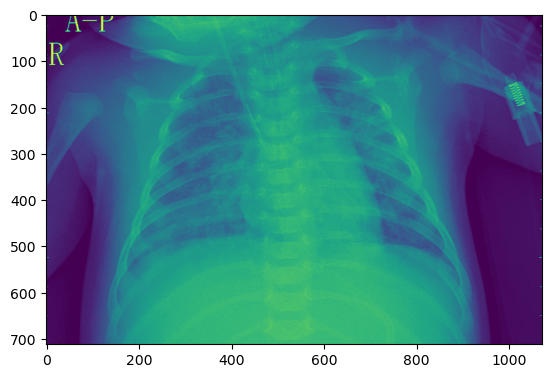

In [35]:
get_random_image('val','p')

In [37]:
# Check Data

In [36]:
from PIL import Image

image = Image.open('data/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
print(image.format)
print(image.mode)
print(image.size)

JPEG
L
(1776, 1416)


In [ ]:
# image mode 'L' means it's a grey scale image

In [40]:
# How to convert an image to RGB format
grey_img = Image.open('data/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001-Copy1.jpeg')
rbg_img = grey_img.convert('RGB')
print(rbg_img.mode)

RGB


In [50]:
#Convert all the images and keep it in single respective folder from 'train', 'test' and 'vale' folders

def convert_image(folder_name):
    folder = f'./data/chest_xray/{folder_name}/*/*.jpeg'
    
    counterPneu = 0
    counterNorm = 0
    
    img_path = glob.glob(folder)
    
    for i in img_path:
        if "person" in i:
            full_size_image = Image.open(i)
            resized_image = full_size_image.resize((224, 224))
            plt.imsave(f'./data/chest_xray/{folder_name}' + f'/{folder_name}' + '_pneumonima' \
                       + str(counterPneu) + '.jpeg', arr=resized_image, format='jpeg', cmap='gray')
            counterPneu += 1
        else:
            full_size_image = Image.open(i)
            resized_image = full_size_image.resize((224, 224))
            plt.imsave(f'./data/chest_xray/{folder_name}' + f'/{folder_name}' + '_normal' \
                       + str(counterNorm) + '.jpeg', arr=resized_image, format='jpeg', cmap='gray')
            counterNorm += 1
            

In [51]:
#Convert images in 'train' folder
convert_image('train')

In [52]:
#Convert images in 'test' folder
convert_image('test')

In [53]:
#Convert images in 'val' folder
convert_image('val')

In [61]:
# Creating dataframe

import glob
import pandas as pd

folder = './data/chest_xray/*/*.jpeg'

category=[]
condition=[]
fileName=[]

all_files = glob.glob(folder)

for file in all_files:
    if 'train' in file:
        if 'pneumonima' in file:
            category.append('train')
            condition.append('pneumonia')
            fileName.append(file)
        elif 'normal' in file:
            category.append('train')
            condition.append('normal')
            fileName.append(file)
            
            
    elif 'test' in file:
        if 'pneumonima' in file:
            category.append('test')
            condition.append('pneumonia')
            fileName.append(file)
        elif 'normal' in file:
            category.append('test')
            condition.append('normal')
            fileName.append(file)
            
    elif 'val' in file:
        if 'pneumonima' in file:
            category.append('val')
            condition.append('pneumonia')
            fileName.append(file)
        elif 'normal' in file:
            category.append('val')
            condition.append('normal')
            fileName.append(file)
            
all_data_frame = pd.DataFrame({'Dataset Type': category, 'X-Ray Result': condition, 'File Name': fileName})
print(all_data_frame.head())

  Dataset Type X-Ray Result                                       File Name
0         test    pneumonia  ./data/chest_xray/test/test_pneumonima389.jpeg
1         test       normal        ./data/chest_xray/test/test_normal4.jpeg
2         test    pneumonia   ./data/chest_xray/test/test_pneumonima22.jpeg
3         test       normal      ./data/chest_xray/test/test_normal103.jpeg
4         test    pneumonia  ./data/chest_xray/test/test_pneumonima310.jpeg


In [62]:
all_data_frame

,Dataset Type,X-Ray Result,File Name
0,test,pneumonia,./data/chest_xray/test/test_pneumonima389.jpeg
1,test,normal,./data/chest_xray/test/test_normal4.jpeg
2,test,pneumonia,./data/chest_xray/test/test_pneumonima22.jpeg
3,test,normal,./data/chest_xray/test/test_normal103.jpeg
4,test,pneumonia,./data/chest_xray/test/test_pneumonima310.jpeg
...,...,...,...
5852,val,pneumonia,./data/chest_xray/val/val_pneumonima4.jpeg
5853,val,normal,./data/chest_xray/val/val_normal4.jpeg
5854,val,normal,./data/chest_xray/val/val_normal8.jpeg
5855,val,normal,./data/chest_xray/val/val_normal0.jpeg


/tmp/ipykernel_21/4207449206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barG = sb.catplot(x='X-Ray Result', col='Dataset Type', kind='count', palette='ch: .55', data=all_data_frame, legend=True)


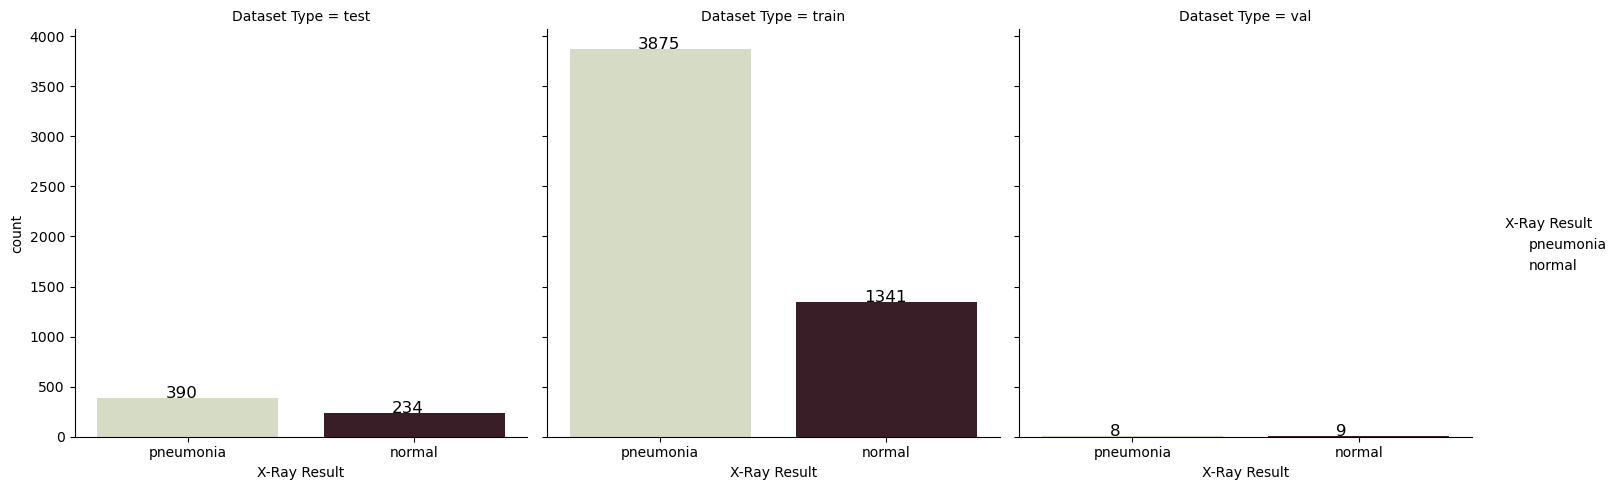

In [76]:
import seaborn as sb
barG = sb.catplot(x='X-Ray Result', col='Dataset Type', kind='count', palette='ch: .55', data=all_data_frame, legend=True)


for i in range(0,3):
    ax = barG.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
                p.get_height()*1,
                '{0:.0f}'.format(p.get_height()),
                color='black',
                rotation='horizontal',
                size='large')


In [79]:
# Create lst dataframe
import os

def lst_dataframe(path):
    folder = f'./data/chest_xray/{path}/*.jpeg'
    img_path = glob.glob(folder)
    
    lst_dataFrame = pd.DataFrame(columns=['labels', 's3_path' ], dtype=object)
    counter = 0
    label = ''
    
    for i in img_path:
        if 'pneumonima' in i:
            label = 1
        else:
            label = 0
            
        lst_dataFrame.loc[counter] = [label, os.path.basename(i)]
        counter += 1
        
    return lst_dataFrame

In [82]:
train_df_lst = lst_dataframe('train')
train_df_lst.head()

,labels,s3_path
0,0,train_normal1203.jpeg
1,1,train_pneumonima1014.jpeg
2,1,train_pneumonima2299.jpeg
3,0,train_normal1041.jpeg
4,1,train_pneumonima1489.jpeg


In [83]:
test_df_lst = lst_dataframe('test')
test_df_lst.head()

,labels,s3_path
0,1,test_pneumonima389.jpeg
1,0,test_normal4.jpeg
2,1,test_pneumonima22.jpeg
3,0,test_normal103.jpeg
4,1,test_pneumonima310.jpeg


In [85]:
# Create lst files from dataframe
def create_lst(df,prefix):
    return df[['labels','s3_path']].to_csv(
    f'{prefix}.lst', sep='\t', index=True, header=False
    )
create_lst(train_df_lst, 'train')
create_lst(test_df_lst, 'test')

In [5]:
bucketName='chest-xray-images'
bucketArn='arn:aws:s3:::chest-xray-images'
region='us-east-1'

In [7]:
import os
os.environ['DEFAULT_S3_BUCKET'] = bucketName

In [89]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/

upload: data/chest_xray/train/train_normal1.jpeg to s3://chest-xray-images/train/train_normal1.jpeg
upload: data/chest_xray/train/train_normal1000.jpeg to s3://chest-xray-images/train/train_normal1000.jpeg
upload: data/chest_xray/train/train_normal0.jpeg to s3://chest-xray-images/train/train_normal0.jpeg
upload: data/chest_xray/train/.ipynb_checkpoints/train_normal0-checkpoint.jpeg to s3://chest-xray-images/train/.ipynb_checkpoints/train_normal0-checkpoint.jpeg
upload: data/chest_xray/train/train_normal1005.jpeg to s3://chest-xray-images/train/train_normal1005.jpeg
upload: data/chest_xray/train/train_normal1007.jpeg to s3://chest-xray-images/train/train_normal1007.jpeg
upload: data/chest_xray/train/train_normal1001.jpeg to s3://chest-xray-images/train/train_normal1001.jpeg
upload: data/chest_xray/train/train_normal10.jpeg to s3://chest-xray-images/train/train_normal10.jpeg
upload: data/chest_xray/train/train_normal100.jpeg to s3://chest-xray-images/train/train_normal100.jpeg
upload: da

In [92]:
import boto3

boto3.Session().resource('s3').Bucket(bucketName).Object('train.lst').upload_file('./train.lst')
boto3.Session().resource('s3').Bucket(bucketName).Object('test.lst').upload_file('./test.lst')

In [8]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role

session = sagemaker.Session()

algorithm_image = image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location = f's3://{bucketName}/models/image_model'
print("Image Classidier Model: ", algorithm_image)

Image Classidier Model:  811284229777.dkr.ecr.us-east-1.amazonaws.com/image-classification:1


In [9]:
role=get_execution_role()
print('Role: ',role)

Role:  arn:aws:iam::058264094555:role/service-role/SageMaker-DataUser


In [10]:
img_classifier_model = sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.xlarge",
    volume_size=50,
    max_run=432000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=session
)

print("img_classifier_model: ", img_classifier_model)

img_classifier_model:  <sagemaker.estimator.Estimator object at 0x7ff09885e1d0>


In [147]:
count = 0
folder = './data/chest_xray/train/*.jpeg'
img_files = glob.glob(folder)

for i in  img_files:
    count += 1
    
print('count', count)

count 0


In [148]:
img_classifier_model.set_hyperparameters(
    image_shape = "3,224,224",
    num_classes = 2,
    use_pretrained_model = 1,
    num_training_samples=5216,
    augmentation_type = 'crop_color_transform',
    epochs=15,
    early_stopping=True,
    early_stopping_min_epochs=8,
    early_stopping_patience=5,
    early_stopping_tolerance=0.0,
    lr_scheduler_factor=0.1,
    lr_scheduler_step='8,10,12'
)
img_classifier_model

In [149]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges={
    "learning_rate":ContinuousParameter(0.01,0.1),
    "mini_batch_size":CategoricalParameter([8,16,32]),
    "optimizer":CategoricalParameter(["sgd", "adam"])
}

In [150]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=5
max_parallel_jobs=1

In [151]:
tuner = HyperparameterTuner(
    estimator = img_classifier_model,
    hyperparameter_ranges = hyperparameter_ranges,
    objective_metric_name = objective_metric_name,
    objective_type = objective_type,
    max_jobs = max_jobs,
    max_parallel_jobs = max_parallel_jobs
    
)

In [152]:
from sagemaker.session import TrainingInput

model_inputs={
    "train": sagemaker.inputs.TrainingInput(s3_data=f's3://{bucketName}/train/',content_type='application/x-image'),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f's3://{bucketName}/test/',content_type='application/x-image'),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f's3://{bucketName}/train.lst',content_type='application/x-image'),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f's3://{bucketName}/test.lst',content_type='application/x-image')
}

In [153]:
import time

job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name = job_name_prefix + timestamp

In [ ]:
tuner.fit(inputs=model_inputs, job_name=job_name, logs=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [2]:
import sagemaker

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [11]:
role

'arn:aws:iam::058264094555:role/service-role/SageMaker-DataUser'

In [43]:
model = sagemaker.model.Model(
    image_uri = algorithm_image,
    model_data = 's3://chest-xray-images/models/image_model/classifier-2024-05-12-10-13-33-004-2689cf17/output/model.tar.gz',
    role = role
)

In [44]:
# Deploying model for inference
endpoint_name='Pneumonia-image-classifier'

deployment = model.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    endpoint_name=endpoint_name
)

-----------!

In [45]:
from sagemaker.predictor import Predictor

predictor = Predictor("Pneumonia-image-classifier")

In [46]:
# Get inference

from sagemaker.serializers import IdentitySerializer
import base64

file_name='data/chest_xray/val/val_normal0.jpeg'

predictor.serializer = IdentitySerializer('image/jpeg')

with open(file_name, 'rb') as file:
    payload = file.read()
    
inference=predictor.predict(data=payload)

print('Inference: ', inference)

Inference:  b'[0.911028265953064, 0.08897168189287186]'


In [47]:
# Get prediction for all the images in Validation set and setup data for Confusion matrix
import glob
import json
import numpy as np

file_path="data/chest_xray/val/*.jpeg"
files=glob.glob(file_path)

y_true=[]
y_pred=[]

def get_prediction():
    for file in files:
        if 'pneumonima' in file:
            y_true.append(1)
            with open(file,'rb') as f:
                payload = f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result = json.loads(inference)
                predicted_class = np.argmax(result)
                y_pred.append(predicted_class)
        elif 'normal' in file:
            y_true.append(0)
            with open(file,'rb') as f:
                payload = f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result = json.loads(inference)
                predicted_class = np.argmax(result)
                y_pred.append(predicted_class)
                

get_prediction()
print('y_true:', y_true)
print('y_pred:', y_pred)        

y_true: [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
y_pred: [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[4, 5],
       [1, 7]])

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.58      0.88      0.70         8

    accuracy                           0.65        17
   macro avg       0.69      0.66      0.64        17
weighted avg       0.70      0.65      0.63        17

